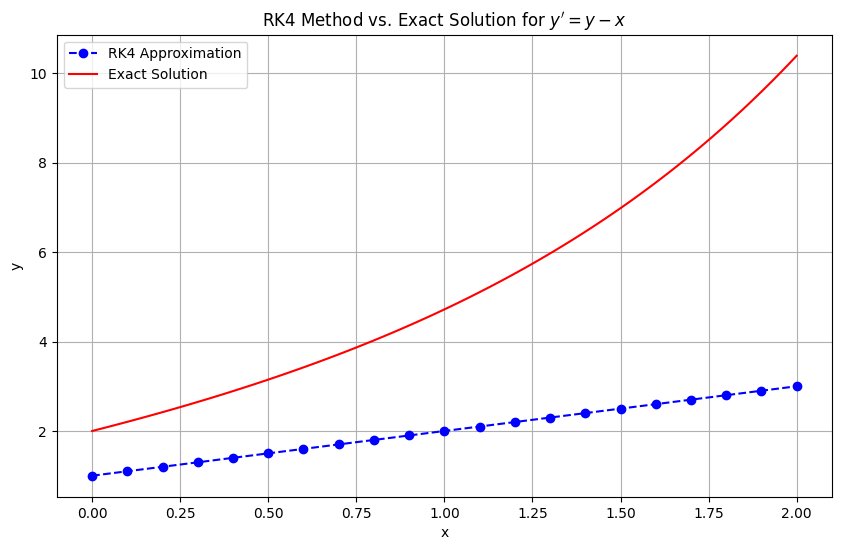

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    """
    Defines the differential equation dy/dx = y - x.
    This function represents the right-hand side of the ODE.
    """
    return y - x

def exact_solution(x):
    """
    The analytical solution to the differential equation.
    y(x) = e^x + x + 1
    """
    return np.exp(x) + x + 1

def runge_kutta_4(f, x0, y0, h, num_steps):
    """
    Implements the fourth-order Runge-Kutta method to solve an ODE.

    Args:
        f (function): The function defining the ODE.
        x0 (float): The initial value of x.
        y0 (float): The initial value of y.
        h (float): The step size.
        num_steps (int): The number of steps to take.

    Returns:
        tuple: A tuple containing lists of the x and y values from the numerical solution.
    """
    x_vals = [x0]
    y_vals = [y0]
    x = x0
    y = y0

    for _ in range(num_steps):
        # Calculate the four slopes (k1, k2, k3, k4)
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(x + h, y + k3)

        # Calculate the next y value
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x = x + h

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

# --- Main execution ---

# 1. Define problem parameters
x0 = 0.0          # Initial x value
y0 = 1.0          # Initial y value
h = 0.1           # Step size
num_steps = 20    # Number of steps to compute
end_x = x0 + h * num_steps

# 2. Compute the RK4 numerical solution
rk4_x, rk4_y = runge_kutta_4(f, x0, y0, h, num_steps)

# 3. Compute the analytical solution for comparison
analytical_x = np.linspace(x0, end_x, 100) # Use more points for a smooth curve
analytical_y = exact_solution(analytical_x)

# 4. Plot the results
plt.figure(figsize=(10, 6))

# Plot the RK4 approximation
plt.plot(rk4_x, rk4_y, 'o--', color='blue', label='RK4 Approximation')

# Plot the exact solution
plt.plot(analytical_x, analytical_y, color='red', label='Exact Solution')

# Add plot details
plt.title(f'RK4 Method vs. Exact Solution for $y\' = y - x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
